# Miniproject 4 : Tree Based Models
## Manuel Serna-Aguilera

We will do following 3 Tasks:
1. An example of Decsion Tree
2. Bagging, Random Forest and Boosting for Regression
3. Random Forest and Boosting for Classification

# Task 1

1. For the Hitters Data we discussed in the class, split the data into 80-20 %  training and validation data. (You can get the data from the Github repo I provided in the beginning of the class.)
2. Fit a Decision Tree with Number of leaf nodes 5, 10, 15, 20, .... 50. For each model compute training error and validation errror (MSE). Plot training a graph with number of leaves vs Training and Validation MSE. 

Food for thought    
1. When we discussed Decision Treee in the class, the book mentions building decision tree are not computationally expensive. Imagine you have 1000 varaibles and 10,000 data samples(training data), sounds like a very computationally expensive task. Why the book might have the argument that decision trees are not computationally expensive?
2. Do you see any trend on training MSE and validation MSE as numbers of leaves increases? What happens if you increase the number of leaves to number of training data?


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1) i) Split Data

In [2]:
hit_df = pd.read_csv('Hitters.csv')

In [3]:
# Display several entries
hit_df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [4]:
# Convert the three categorical variables with dummy variables
hit_df = pd.get_dummies(hit_df, prefix=['League', 'Division', 'NewLeague'])

In [5]:
# Drop rows with null entries
hit_df = hit_df.dropna()

In [6]:
output_name = 'Salary'
y = hit_df[[output_name]].values # get salary--our output to predict

In [7]:
x = hit_df.drop(output_name, axis=1).values # all other columns are input features

In [8]:
# Scale input and output
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

In [9]:
# Get train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 1) ii) Fit Trees

In [10]:
def evaluate(model, x, y):
    pred = model.predict(x)
    diff = y - pred
    return (diff**2).mean()

In [11]:
# Create trees with number of leaves increasing by 5
from sklearn.tree import DecisionTreeRegressor as DTR

reg_trees = [DTR(max_leaf_nodes = i, random_state=42) for i in range(5, 55, 5)]

In [12]:
# Fit trees to data
N = len(reg_trees)

for i in range(N):
    reg_trees[i].fit(x_train, y_train)

In [13]:
# Compute MSE
train_errors = [0.0 for i in range(N)]
val_errors = [0.0 for i in range(N)]

for i in range(N):
    train_errors[i] = evaluate(reg_trees[i], x_train, y_train)
    val_errors[i] = evaluate(reg_trees[i], x_test, y_test)

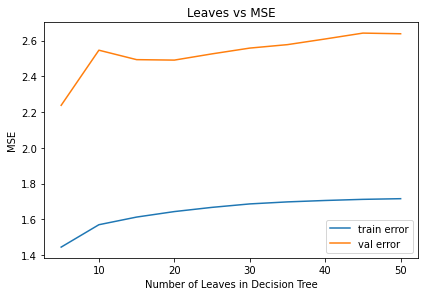

In [14]:
plt.plot(range(5, 55, 5), train_errors, label='train error')
plt.plot(range(5, 55, 5), val_errors, label='val error')
plt.ylabel('MSE')
plt.xlabel('Number of Leaves in Decision Tree')
plt.tight_layout()
plt.title('Leaves vs MSE')
plt.legend()
plt.show()

# Task 2

Boston Housing Data Set
(You can downlaod dataset from http://lib.stat.cmu.edu/datasets/boston or import from sklearn.dataset)
1. For a Boston Housing Data Set, split data into 80-20 % train and test. Perform Random Forest on Training Data. Compute Train Error, Out of Sample Error and Test Error (ALL MSE). 
When you do Random Forest, you will see the model depends on following three parameters: 
a. n_estimators : Numbers of Trees
b. min_samples_leaf : Minimum  numbers of samples in the leaf nodes. 
c. max_features : Numbers of Features to consider at each split during tree building.    
You can use RandomizedSearchCV from sklearn to perform grid search and find the best model pararamters.    

(Here is a good resource on Random Forest, Feature selection and parameter optimization that uses Boston Housing Dataset as an example.)      
https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5     

2. Perform Boosting (You can use XG Boost) and compare your best validation MSE from Random Forest to Validation MSE from Boosting. 

## 2) i) a) Split data

In [15]:
# Read in dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [16]:
# Get train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Create random forest regressor with pre-set parameters
from sklearn.ensemble import RandomForestRegressor as RFR
num_trees = 100 # number of estimators to use in random forest

# NOTE: total features to consider is sqrt of total features
# NOTE: using at least half of features to make splits
forest = RFR(
    n_estimators=num_trees, 
    min_samples_leaf=1, 
    max_features='sqrt',
    oob_score=True
)

In [18]:
forest.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True)

## 2) i) b) Get traininig error, out-of-sample (out-of-bag) error, and testing error

In [19]:
# Compute training error
f_train_error = evaluate(forest, x_train, y_train)
f_train_error

1.76467130693069

In [20]:
# Compute out-of-sample error
f_oob_error = 1 - forest.oob_score_
f_oob_error

0.14417332041029907

In [21]:
# Compute test error
f_test_error = evaluate(forest, x_test, y_test)
f_test_error

5.404608862745097

## 2) ii) a) Perform boosting

In [22]:
from xgboost import XGBRegressor

In [23]:
clf = XGBRegressor(
    #n_estimators=num_trees, 
    #max_depth=5,
    #eta=1,
    verbosity=0
)

In [24]:
clf.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [25]:
# Get validation (same as test set) MSE
boost_pred = clf.predict(x_test)
boost_mse = evaluate(clf, x_test, y_test)
boost_mse

6.237269410289812

## 2) ii) b) Compare best validation MSE from Random Forest to validation MSE from Boosting.

In [26]:
print(
    'Val MSE (Random Forest):{:.6f}\nVal MSE (Boosting):\t{:.6f}'.format(f_test_error, boost_mse)
)

Val MSE (Random Forest):5.404609
Val MSE (Boosting):	6.237269


## Task 2) ii) b) Response
Based on the above comparison, it seems the validation MSE for random forest and boosting is approximately the same. At the current scale, Boosting is somewhat better (but not by a lot).

# Task 3
Classification of Wine Data 

In [27]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [28]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
# Drop one of the classes so we have only two classes. 
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
print(y)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3]


In [30]:
# Create Labels for classes, Encode from 2/3 to 0/1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
#print(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

## Task 3, Do your part here
Perform Classification using Decision Tree and Bagging Classifier. Use following params      

For Decision Tree    

criterion='entropy'    
max_depth=None    
random_state=1    


For Bagging Classifier     
base_estimator=tree   
n_estimators=500    
max_samples=1.0  
max_features=1.0    
bootstrap=True   
bootstrap_features=False      
n_jobs=1       
random_state=1

Print Out your train and test accuracies for Decision Tree and Bagging Classifier

In [32]:
# Fit decision tree classifier
tree_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=1
)

In [33]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
# Fit bagging classifier
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=1,
    random_state=1
)

In [35]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=1)

In [36]:
# Print train and test accuracies for both classifiers
tree_train_acc = tree_clf.score(X_train, y_train)
tree_test_acc = tree_clf.score(X_test, y_test)

bag_train_acc = bag_clf.score(X_train, y_train)
bag_test_acc = bag_clf.score(X_test, y_test)

In [37]:
print('Decision Tree:')
print('Train Acc: {:.6f}'.format(tree_train_acc))
print('Test Acc:  {:.6f}'.format(tree_test_acc))

print('Bagging:')
print('Train Acc: {:.6f}'.format(bag_train_acc))
print('Test Acc:  {:.6f}'.format(bag_test_acc))

Decision Tree:
Train Acc: 1.000000
Test Acc:  0.833333
Bagging:
Train Acc: 1.000000
Test Acc:  0.916667


For this dataset, it clear that for previously unseen data samples, bagging is able to classify significantly better than a single decision tree classifier. This makes sense as we are bootstrapping with 500 different tree classifiers in the bag classifier.